In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import fashion_mnist
from keras.callbacks import History
import time
import warnings
warnings.filterwarnings("ignore")

Nel seguente notebook, verranno addestrati dei modelli di ANN sui dataset **MNIST** e **fashion MNIST**.
Per il MNIST il modello è stato addestrato sulle immagini tramite la vettorizzazione dei pixel in numeri che ne specificano l'intensità del colore, che indicano numeri, facendo dunque categorizzare al modello il numero corretto in base all'immagine uscita.
 per il fashion MNIST i modelli sono stati allenati sui dati immagini tramite la vettorizzazione dei pixel in numeri che ne specificano l'intensità del colore e categorizzare bene le seguenti immagini nella giusta classe di appartenenza (di abbigliamento). I modelli sono stati testati su tre diversi criteri di ottimizzazione basati sulla **discesa lungo il gradiente**

# MNIST

Vogliamo andare a creare un modello di ANN che riesca a categorizzare correttamente il dataset MNIST, un dataset contenente immagini di numeri che vanno da 0 a 9. La seguente categorizzazione sarà possibile attraverso un analisi preliminare del dataset, che contiene qualche accortezza in più di quelle viste fino ad ora proprio per la presenza di immagini (scematizzate come numeri).

In [5]:
X_mnist, Y_mnist = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False, parser="pandas")       # Leggo e assegno il dataset alle variabili X_mnist e Y_mnist
Y_mnist = Y_mnist.astype(int)      # Trasformo Y_mnist in un intero
X_mnist = X_mnist/255.             # Normalizzo X_mnist

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_mnist, Y_mnist)     # Splitto i dati in train e test ---> 80%/20%

In [7]:
# Cambio la dimensionalità dei target di train e test, cambiando il numero di colonne, da 1 al numero di categorie (10), in maniera tale che la i-esima componente del target normale, che da un certo valore, faccia ricadere il valore 1 nella corrispondente componente della nuova variabile target, nella posizione del valore del target originale
y_train_dummy = to_categorical(y_train, 10)
y_test_dummy = to_categorical(y_test, 10)

In [8]:
print(y_train[0])             # ha valore target = 5 (componente 0)
print(y_train_dummy[0])       # ha valore 1 nella quinta componente dell'array (sempre per la componente 0 del target)

1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
model = Sequential()
model.add(Dense(512, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 567434 (2.16 MB)
Trainable params: 567434 (2.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.fit(X_train, y_train_dummy, epochs=20)

Epoch 1/20
1641/1641 [==============================] - 12s 7ms/step - loss: 0.5821 - accuracy: 0.8514
Epoch 2/20
1641/1641 [==============================] - 11s 7ms/step - loss: 0.2502 - accuracy: 0.9283
Epoch 3/20
1641/1641 [==============================] - 10s 6ms/step - loss: 0.1964 - accuracy: 0.9431
Epoch 4/20
1641/1641 [==============================] - 12s 7ms/step - loss: 0.1611 - accuracy: 0.9533
Epoch 5/20
1641/1641 [==============================] - 11s 7ms/step - loss: 0.1361 - accuracy: 0.9610
Epoch 6/20
1641/1641 [==============================] - 12s 7ms/step - loss: 0.1172 - accuracy: 0.9662
Epoch 7/20
1641/1641 [==============================] - 11s 7ms/step - loss: 0.1027 - accuracy: 0.9703
Epoch 8/20
1641/1641 [==============================] - 11s 7ms/step - loss: 0.0903 - accuracy: 0.9743
Epoch 9/20
1641/1641 [==============================] - 10s 6ms/step - loss: 0.0790 - accuracy: 0.9771
Epoch 10/20
1641/1641 [==============================] - 11s 7ms/step - l

In [11]:
loss, acc = model.evaluate(X_test, y_test_dummy)

547/547 [==============================] - 3s 5ms/step - loss: 0.0772 - accuracy: 0.9764


547/547 [==============================] - 2s 3ms/step
numero 3 classificato come 5


<Figure size 400x400 with 0 Axes>

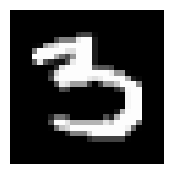

numero 7 classificato come 1


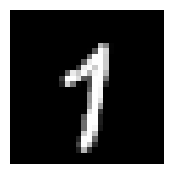

numero 8 classificato come 3


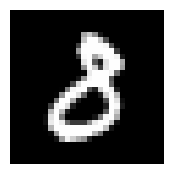

numero 6 classificato come 4


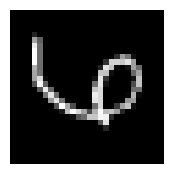

numero 4 classificato come 9


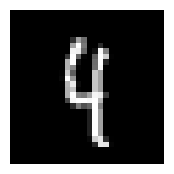

numero 2 classificato come 8


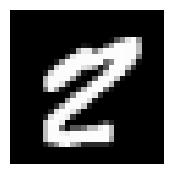

numero 3 classificato come 9


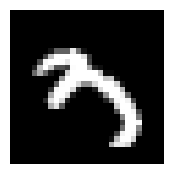

numero 0 classificato come 6


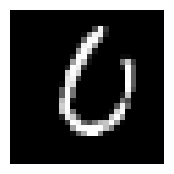

numero 3 classificato come 5


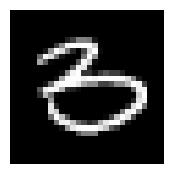

numero 8 classificato come 5


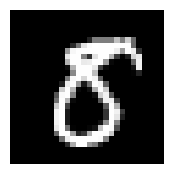

numero 8 classificato come 5


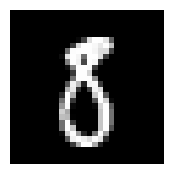

numero 1 classificato come 3


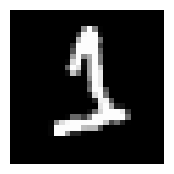

numero 2 classificato come 7


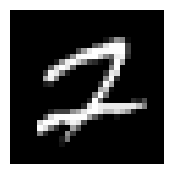

numero 6 classificato come 5


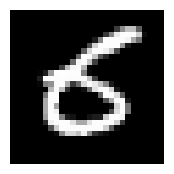

numero 8 classificato come 6


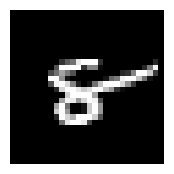

numero 3 classificato come 8


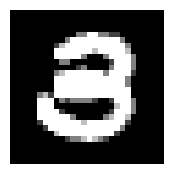

numero 7 classificato come 1


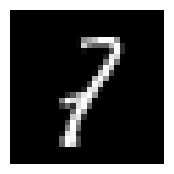

numero 7 classificato come 9


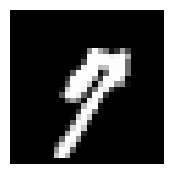

numero 7 classificato come 9


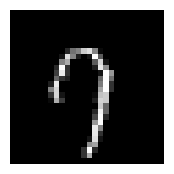

numero 6 classificato come 2


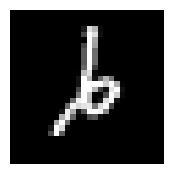

numero 5 classificato come 0


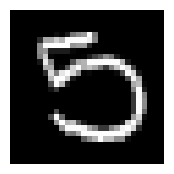

numero 2 classificato come 1


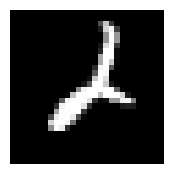

numero 4 classificato come 1


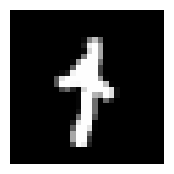

numero 8 classificato come 4


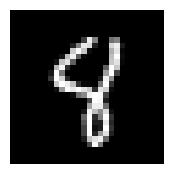

numero 7 classificato come 1


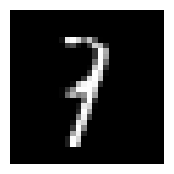

numero 3 classificato come 7


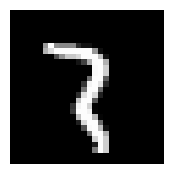

numero 8 classificato come 1


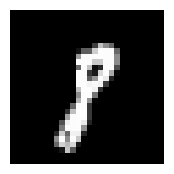

numero 1 classificato come 2


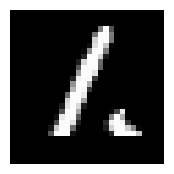

numero 3 classificato come 5


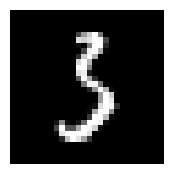

numero 4 classificato come 9


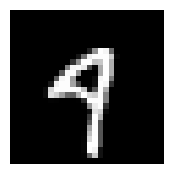

numero 8 classificato come 5


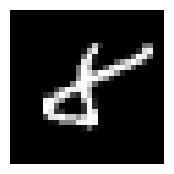

numero 9 classificato come 5


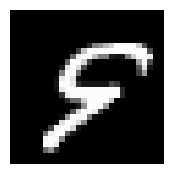

numero 3 classificato come 8


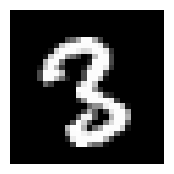

numero 2 classificato come 3


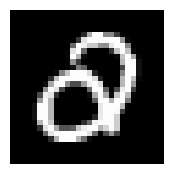

numero 4 classificato come 9


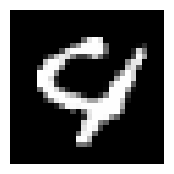

numero 2 classificato come 1


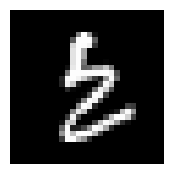

numero 8 classificato come 5


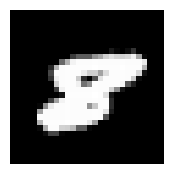

numero 8 classificato come 6


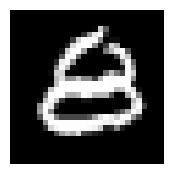

numero 0 classificato come 1


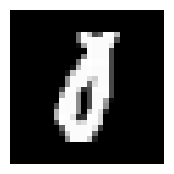

numero 6 classificato come 0


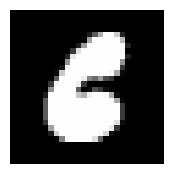

numero 2 classificato come 7


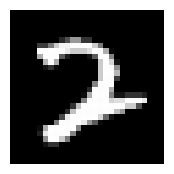

numero 2 classificato come 8


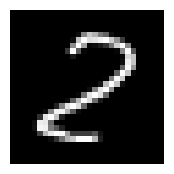

numero 5 classificato come 4


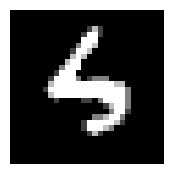

numero 0 classificato come 8


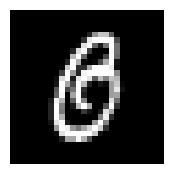

numero 9 classificato come 8


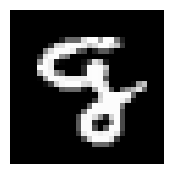

numero 7 classificato come 1


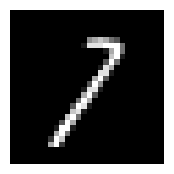

numero 3 classificato come 2


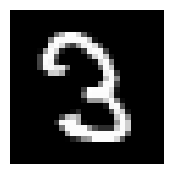

numero 5 classificato come 8


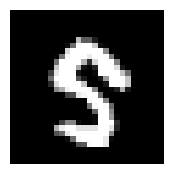

numero 5 classificato come 3


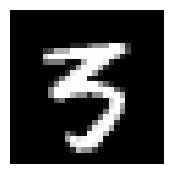

numero 2 classificato come 7


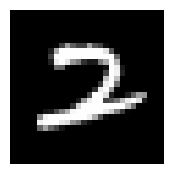

numero 5 classificato come 9


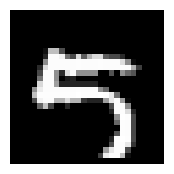

numero 4 classificato come 9


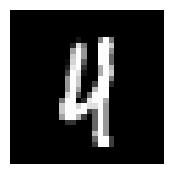

numero 7 classificato come 9


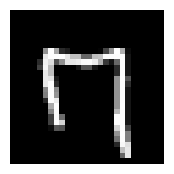

numero 9 classificato come 0


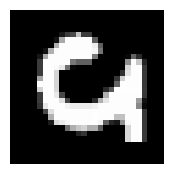

numero 8 classificato come 1


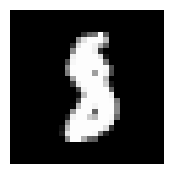

numero 0 classificato come 5


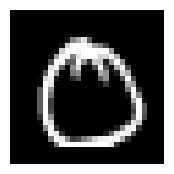

numero 5 classificato come 2


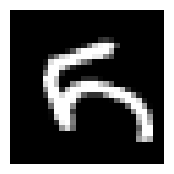

numero 3 classificato come 2


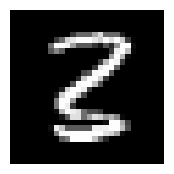

numero 5 classificato come 3


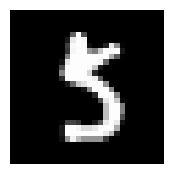

numero 7 classificato come 2


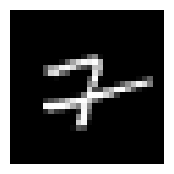

numero 7 classificato come 9


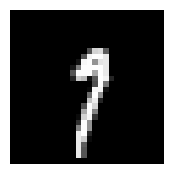

numero 3 classificato come 2


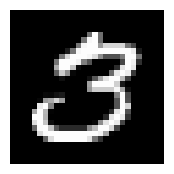

numero 1 classificato come 3


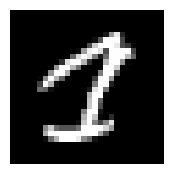

numero 7 classificato come 9


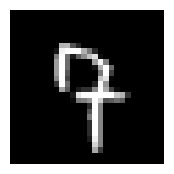

numero 2 classificato come 7


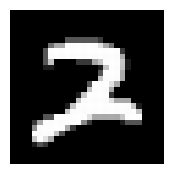

numero 6 classificato come 0


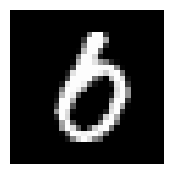

numero 6 classificato come 4


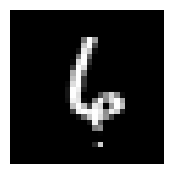

numero 1 classificato come 2


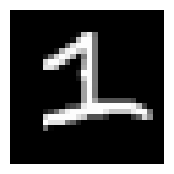

numero 4 classificato come 6


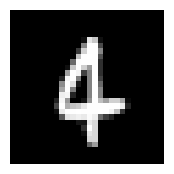

numero 8 classificato come 1


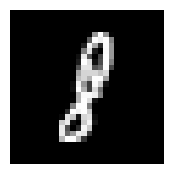

numero 9 classificato come 4


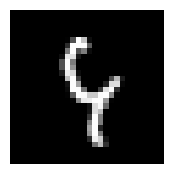

numero 6 classificato come 1


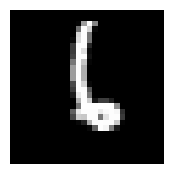

numero 3 classificato come 5


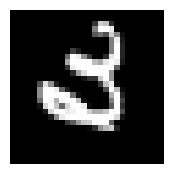

numero 3 classificato come 9


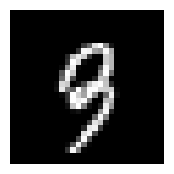

numero 4 classificato come 9


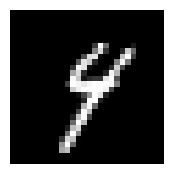

numero 8 classificato come 3


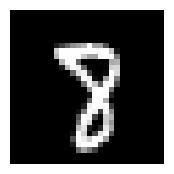

numero 5 classificato come 7


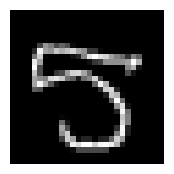

numero 5 classificato come 9


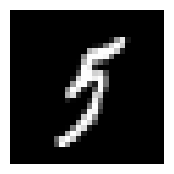

numero 9 classificato come 4


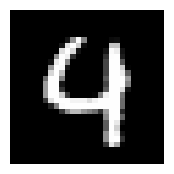

numero 6 classificato come 0


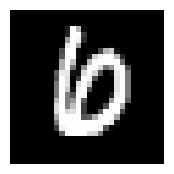

numero 7 classificato come 9


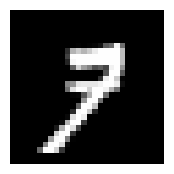

numero 4 classificato come 7


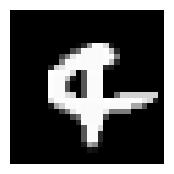

numero 7 classificato come 5


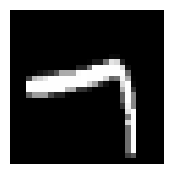

numero 8 classificato come 6


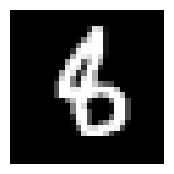

numero 3 classificato come 7


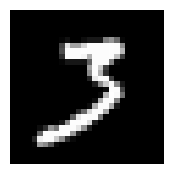

numero 7 classificato come 1


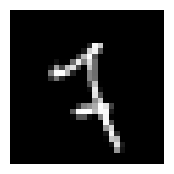

numero 4 classificato come 1


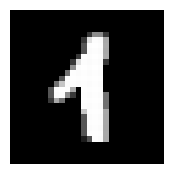

numero 2 classificato come 6


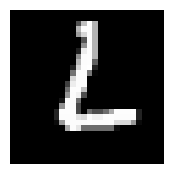

numero 2 classificato come 9


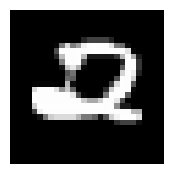

numero 8 classificato come 3


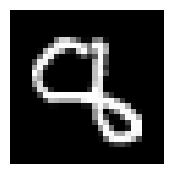

numero 9 classificato come 7


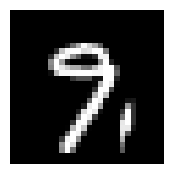

numero 9 classificato come 7


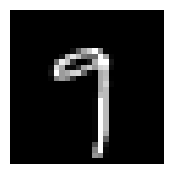

numero 0 classificato come 7


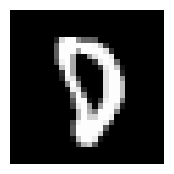

numero 9 classificato come 4


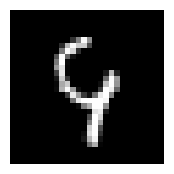

numero 4 classificato come 9


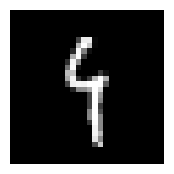

numero 8 classificato come 3


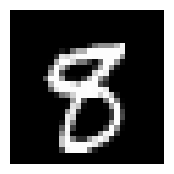

numero 8 classificato come 3


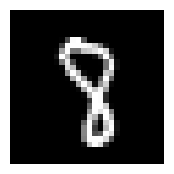

numero 0 classificato come 9


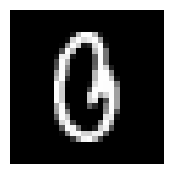

numero 5 classificato come 3


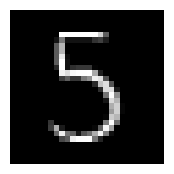

numero 3 classificato come 2


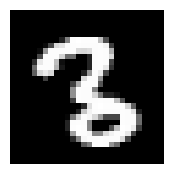

numero 2 classificato come 7


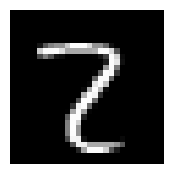

numero 4 classificato come 7


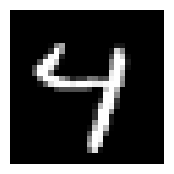

numero 8 classificato come 5


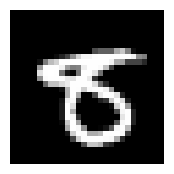

numero 9 classificato come 7


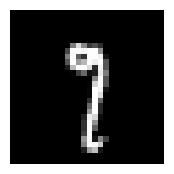

numero 9 classificato come 4


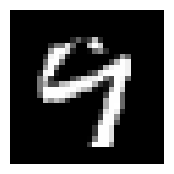

numero 0 classificato come 9


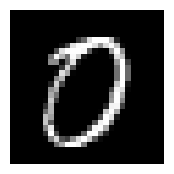

numero 9 classificato come 7


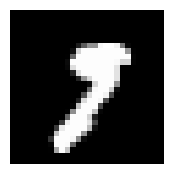

numero 8 classificato come 3


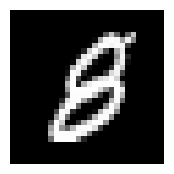

numero 6 classificato come 1


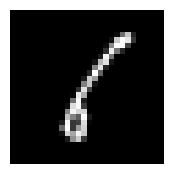

numero 6 classificato come 5


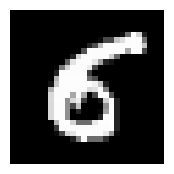

numero 4 classificato come 9


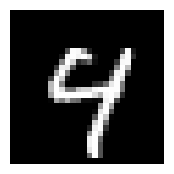

numero 4 classificato come 1


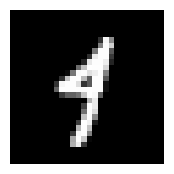

numero 4 classificato come 9


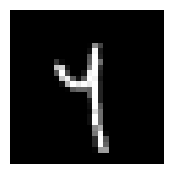

numero 4 classificato come 2


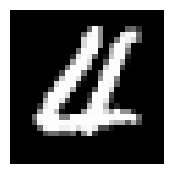

numero 6 classificato come 0


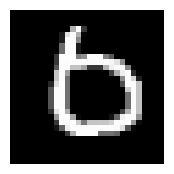

numero 8 classificato come 2


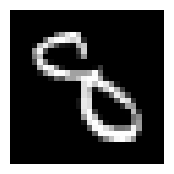

numero 9 classificato come 5


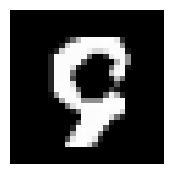

numero 8 classificato come 3


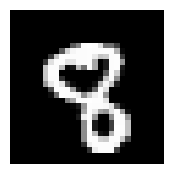

numero 4 classificato come 6


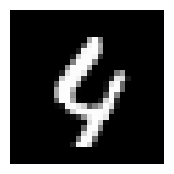

numero 8 classificato come 4


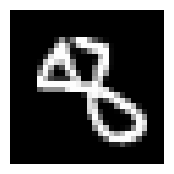

numero 5 classificato come 8


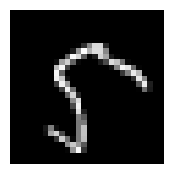

numero 6 classificato come 0


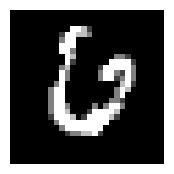

numero 7 classificato come 9


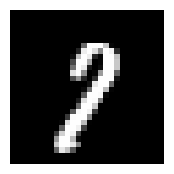

numero 3 classificato come 5


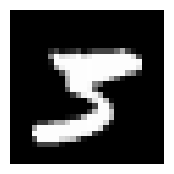

numero 9 classificato come 0


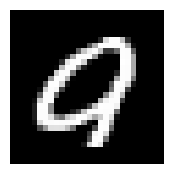

numero 8 classificato come 9


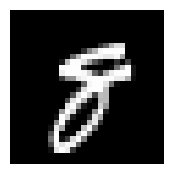

numero 2 classificato come 6


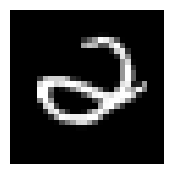

numero 2 classificato come 7


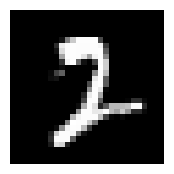

numero 3 classificato come 7


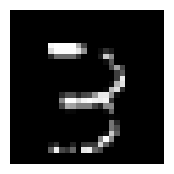

numero 0 classificato come 5


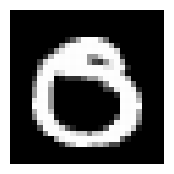

numero 7 classificato come 2


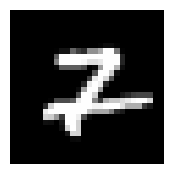

numero 7 classificato come 3


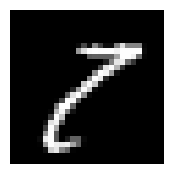

numero 6 classificato come 5


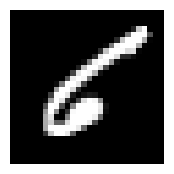

numero 7 classificato come 9


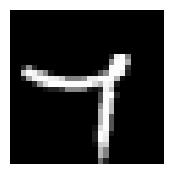

numero 0 classificato come 8


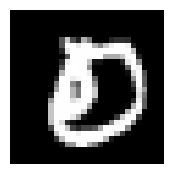

numero 6 classificato come 0


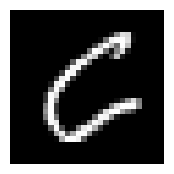

numero 8 classificato come 3


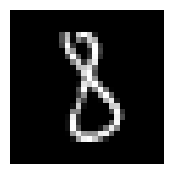

numero 1 classificato come 4


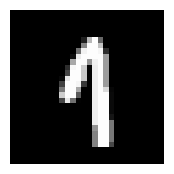

numero 5 classificato come 7


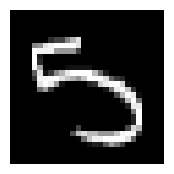

numero 6 classificato come 8


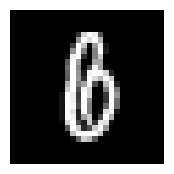

numero 0 classificato come 4


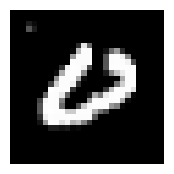

numero 3 classificato come 8


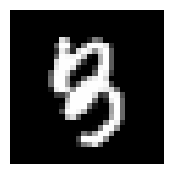

numero 3 classificato come 9


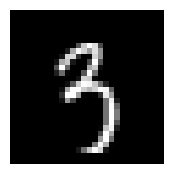

numero 9 classificato come 8


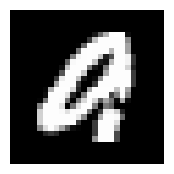

numero 3 classificato come 5


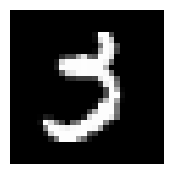

numero 3 classificato come 9


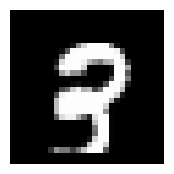

numero 3 classificato come 5


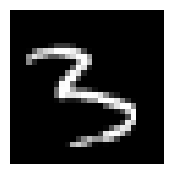

numero 3 classificato come 9


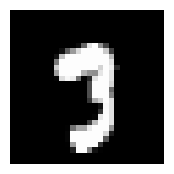

numero 5 classificato come 3


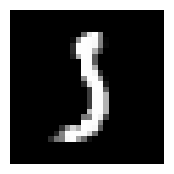

numero 0 classificato come 5


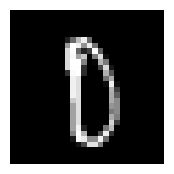

numero 8 classificato come 9


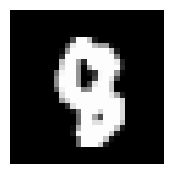

numero 2 classificato come 1


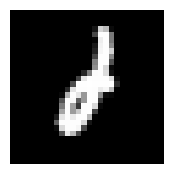

numero 2 classificato come 7


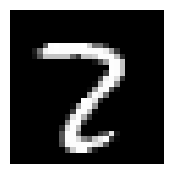

numero 9 classificato come 7


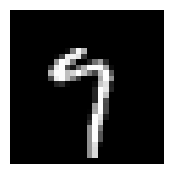

numero 8 classificato come 6


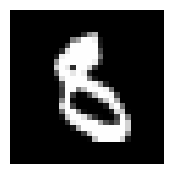

numero 5 classificato come 3


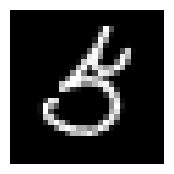

numero 7 classificato come 9


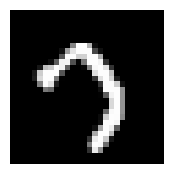

numero 2 classificato come 3


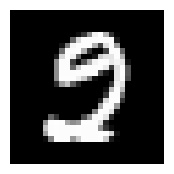

numero 2 classificato come 5


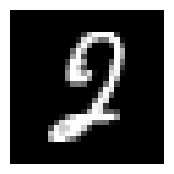

numero 5 classificato come 7


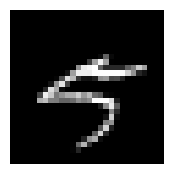

numero 8 classificato come 5


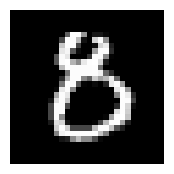

numero 7 classificato come 2


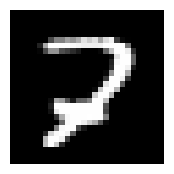

numero 0 classificato come 9


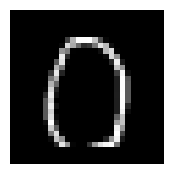

numero 7 classificato come 9


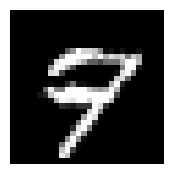

numero 1 classificato come 7


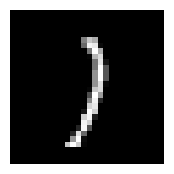

numero 8 classificato come 0


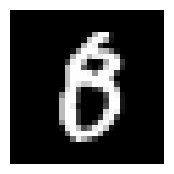

numero 5 classificato come 3


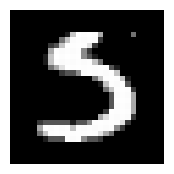

numero 8 classificato come 7


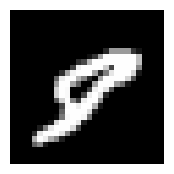

numero 5 classificato come 6


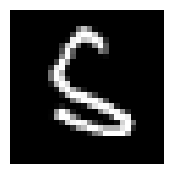

numero 4 classificato come 9


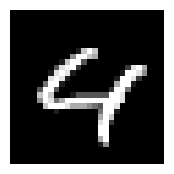

numero 9 classificato come 5


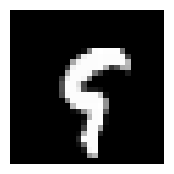

numero 2 classificato come 4


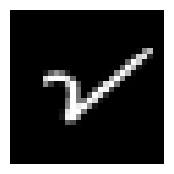

numero 1 classificato come 3


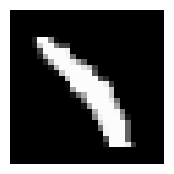

numero 6 classificato come 5


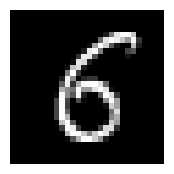

numero 8 classificato come 6


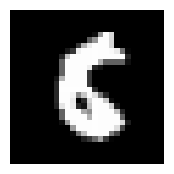

numero 2 classificato come 0


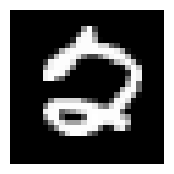

numero 0 classificato come 3


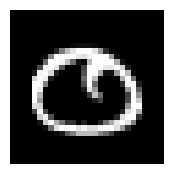

numero 4 classificato come 7


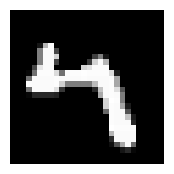

numero 3 classificato come 5


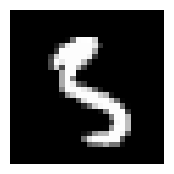

numero 2 classificato come 7


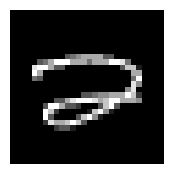

numero 4 classificato come 9


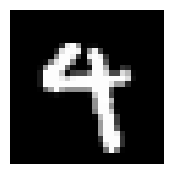

numero 1 classificato come 2


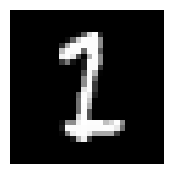

numero 5 classificato come 3


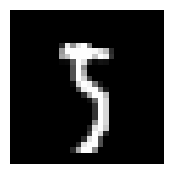

numero 3 classificato come 5


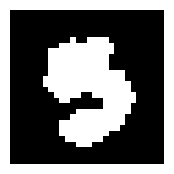

numero 8 classificato come 0


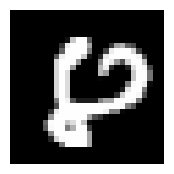

numero 0 classificato come 9


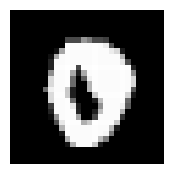

numero 8 classificato come 1


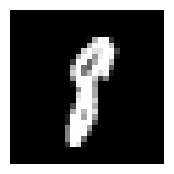

numero 4 classificato come 8


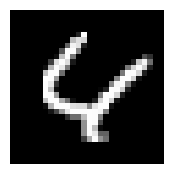

numero 5 classificato come 3


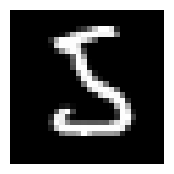

numero 7 classificato come 1


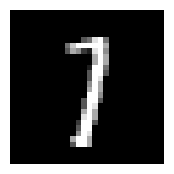

numero 4 classificato come 1


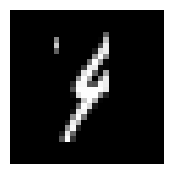

numero 9 classificato come 3


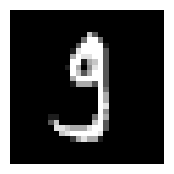

numero 5 classificato come 6


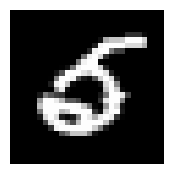

numero 3 classificato come 2


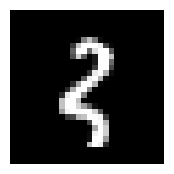

numero 7 classificato come 8


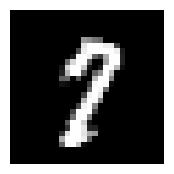

numero 8 classificato come 0


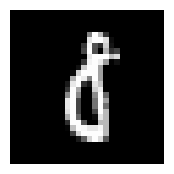

numero 5 classificato come 6


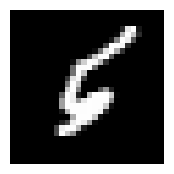

numero 0 classificato come 2


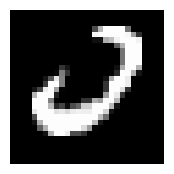

numero 2 classificato come 3


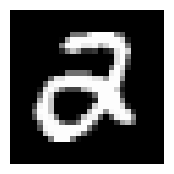

numero 3 classificato come 8


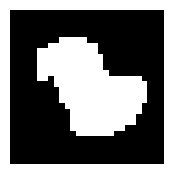

numero 3 classificato come 2


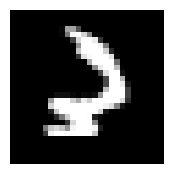

numero 7 classificato come 1


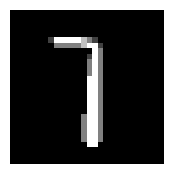

numero 3 classificato come 5


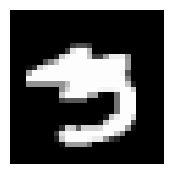

numero 2 classificato come 9


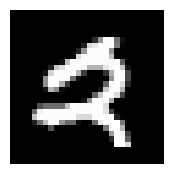

numero 8 classificato come 6


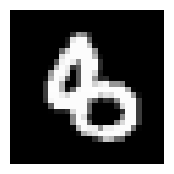

numero 2 classificato come 7


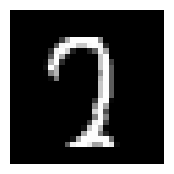

numero 9 classificato come 7


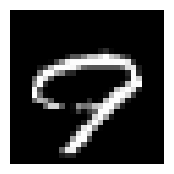

numero 7 classificato come 2


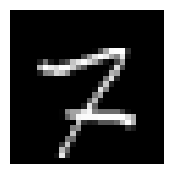

numero 7 classificato come 2


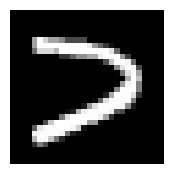

numero 8 classificato come 9


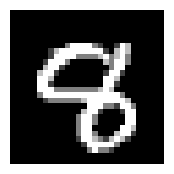

numero 4 classificato come 9


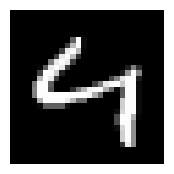

numero 4 classificato come 9


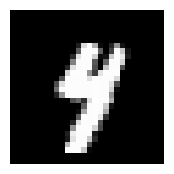

numero 3 classificato come 5


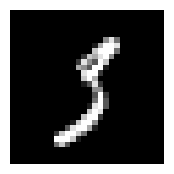

numero 9 classificato come 5


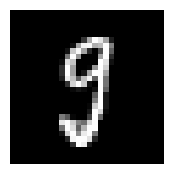

numero 4 classificato come 9


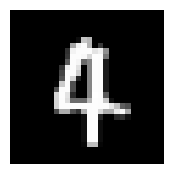

numero 8 classificato come 5


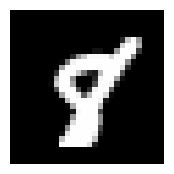

numero 8 classificato come 5


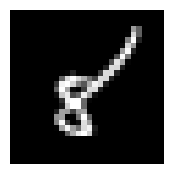

numero 9 classificato come 7


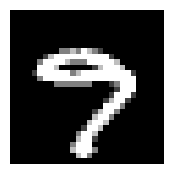

numero 8 classificato come 3


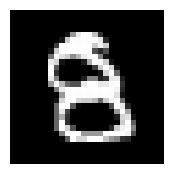

numero 5 classificato come 8


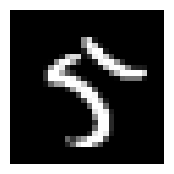

numero 4 classificato come 9


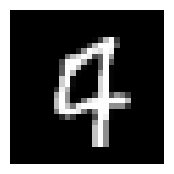

numero 7 classificato come 9


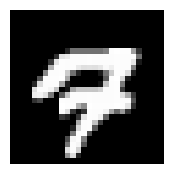

numero 8 classificato come 9


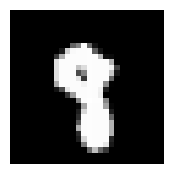

numero 5 classificato come 3


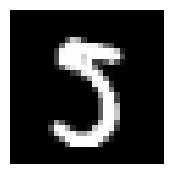

numero 4 classificato come 6


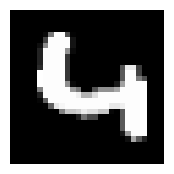

numero 4 classificato come 9


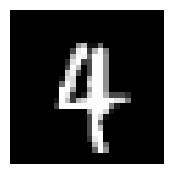

numero 2 classificato come 8


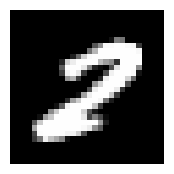

numero 2 classificato come 3


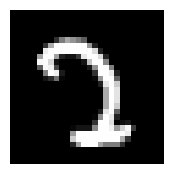

numero 5 classificato come 9


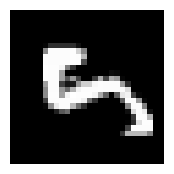

numero 8 classificato come 5


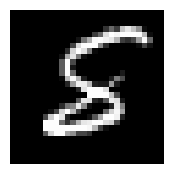

numero 5 classificato come 6


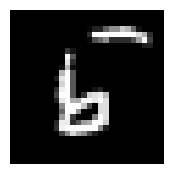

numero 2 classificato come 7


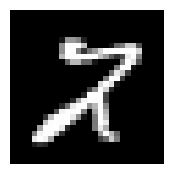

numero 5 classificato come 3


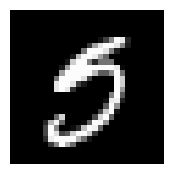

numero 3 classificato come 5


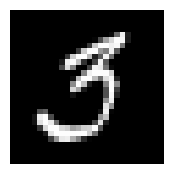

numero 7 classificato come 9


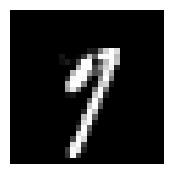

numero 8 classificato come 5


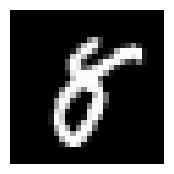

numero 4 classificato come 9


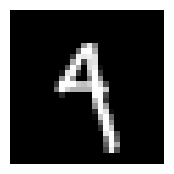

numero 7 classificato come 6


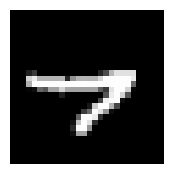

numero 9 classificato come 7


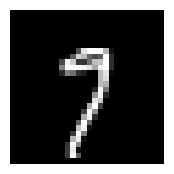

numero 9 classificato come 3


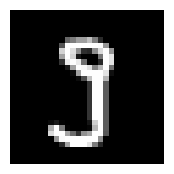

numero 2 classificato come 7


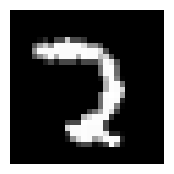

numero 8 classificato come 1


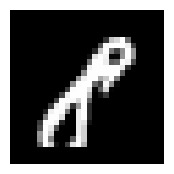

numero 2 classificato come 7


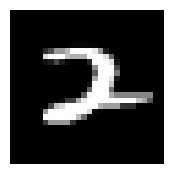

numero 2 classificato come 8


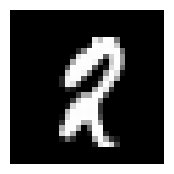

numero 0 classificato come 9


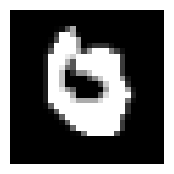

numero 2 classificato come 4


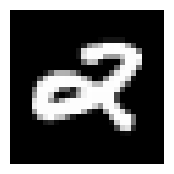

numero 8 classificato come 3


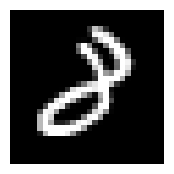

numero 3 classificato come 7


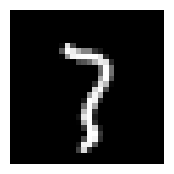

numero 8 classificato come 5


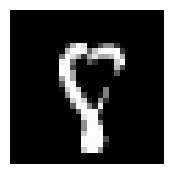

numero 3 classificato come 2


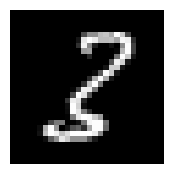

numero 8 classificato come 4


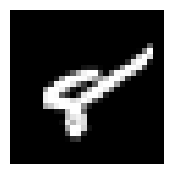

numero 5 classificato come 3


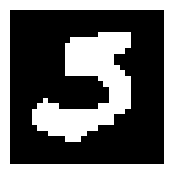

numero 2 classificato come 7


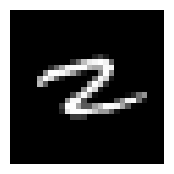

numero 5 classificato come 0


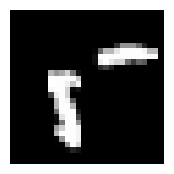

numero 9 classificato come 4


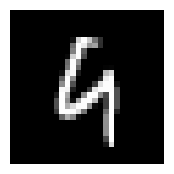

numero 0 classificato come 9


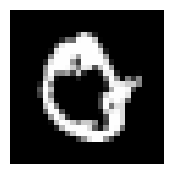

numero 9 classificato come 7


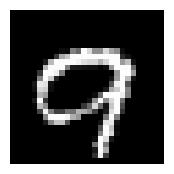

numero 8 classificato come 6


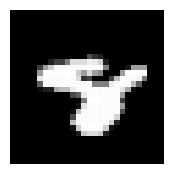

numero 8 classificato come 1


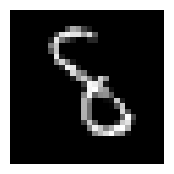

numero 1 classificato come 2


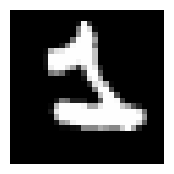

numero 5 classificato come 9


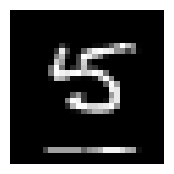

numero 8 classificato come 5


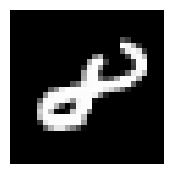

numero 2 classificato come 3


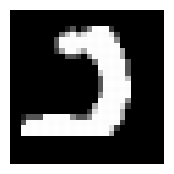

numero 7 classificato come 8


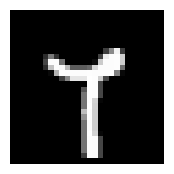

numero 9 classificato come 0


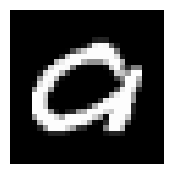

numero 7 classificato come 4


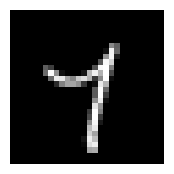

numero 6 classificato come 5


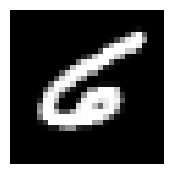

numero 7 classificato come 8


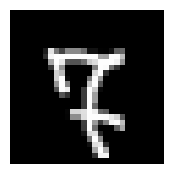

numero 4 classificato come 0


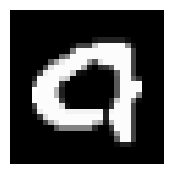

numero 3 classificato come 5


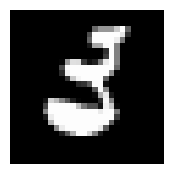

numero 8 classificato come 5


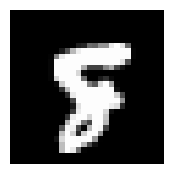

numero 6 classificato come 4


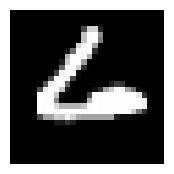

numero 8 classificato come 6


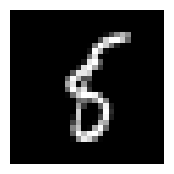

numero 1 classificato come 2


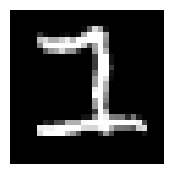

numero 4 classificato come 6


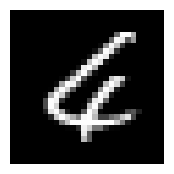

numero 5 classificato come 2


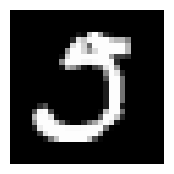

numero 3 classificato come 8


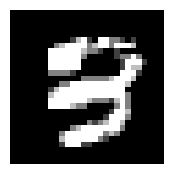

numero 1 classificato come 3


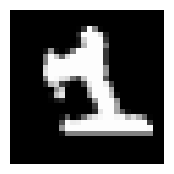

numero 9 classificato come 4


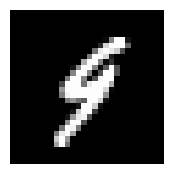

numero 6 classificato come 4


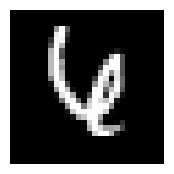

numero 3 classificato come 7


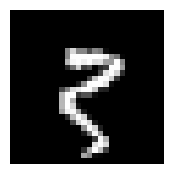

numero 4 classificato come 9


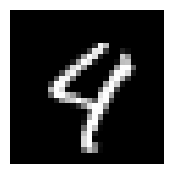

numero 8 classificato come 9


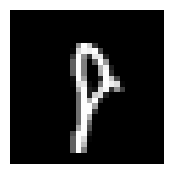

numero 7 classificato come 2


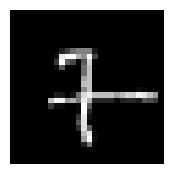

numero 7 classificato come 9


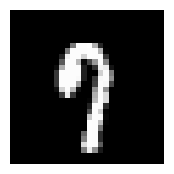

numero 3 classificato come 5


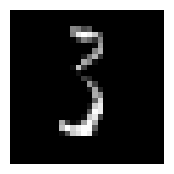

numero 2 classificato come 6


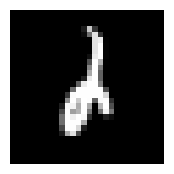

numero 0 classificato come 9


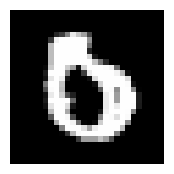

numero 3 classificato come 5


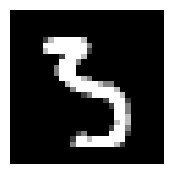

numero 2 classificato come 1


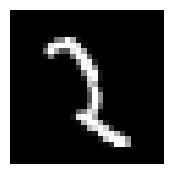

numero 3 classificato come 5


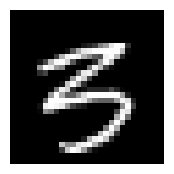

numero 8 classificato come 3


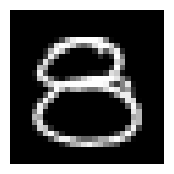

numero 5 classificato come 3


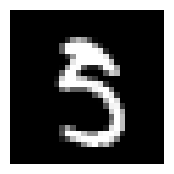

numero 8 classificato come 3


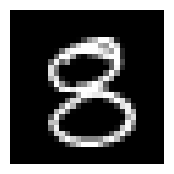

numero 5 classificato come 8


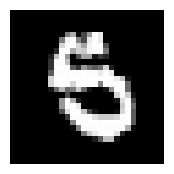

numero 9 classificato come 0


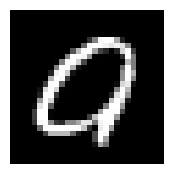

numero 5 classificato come 1


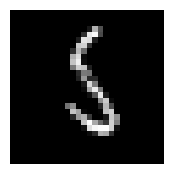

numero 4 classificato come 9


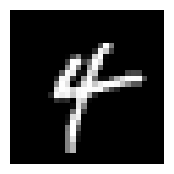

numero 4 classificato come 1


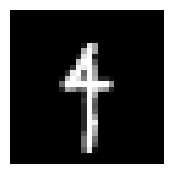

numero 4 classificato come 9


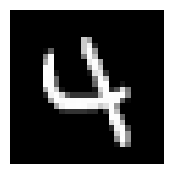

numero 1 classificato come 3


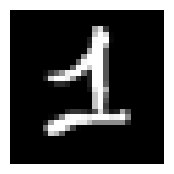

numero 8 classificato come 1


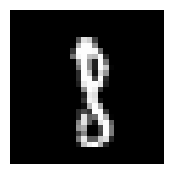

numero 2 classificato come 7


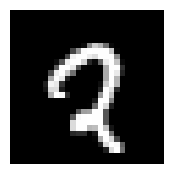

numero 8 classificato come 9


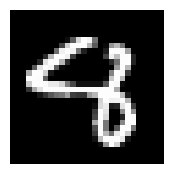

numero 4 classificato come 9


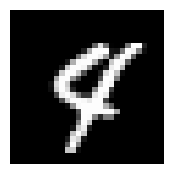

numero 4 classificato come 9


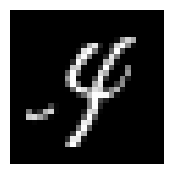

numero 6 classificato come 2


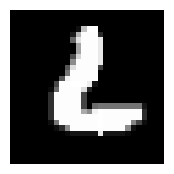

numero 3 classificato come 9


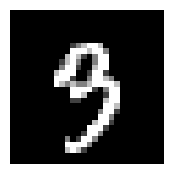

numero 8 classificato come 9


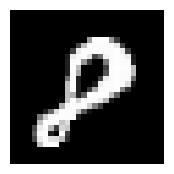

numero 9 classificato come 8


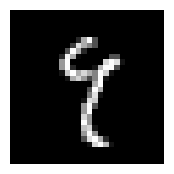

numero 4 classificato come 9


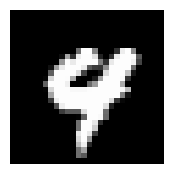

numero 1 classificato come 2


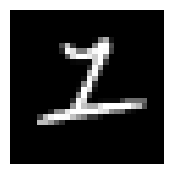

numero 9 classificato come 0


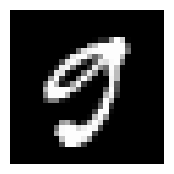

numero 8 classificato come 5


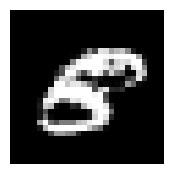

numero 7 classificato come 1


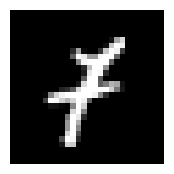

numero 6 classificato come 0


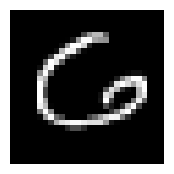

numero 2 classificato come 7


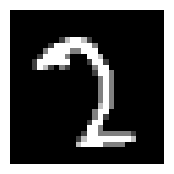

numero 5 classificato come 9


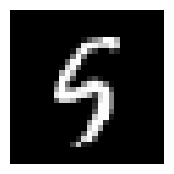

numero 4 classificato come 9


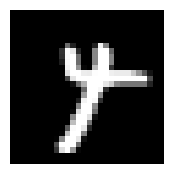

numero 0 classificato come 9


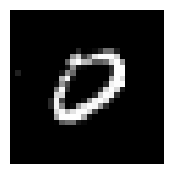

numero 3 classificato come 8


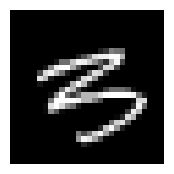

numero 7 classificato come 9


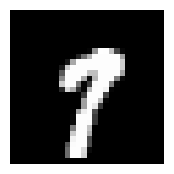

numero 4 classificato come 9


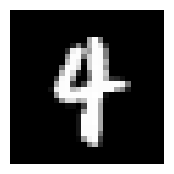

numero 7 classificato come 1


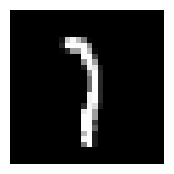

numero 4 classificato come 9


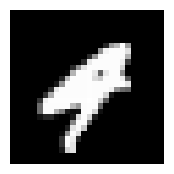

numero 9 classificato come 5


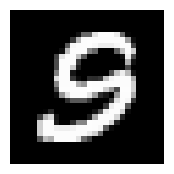

numero 2 classificato come 0


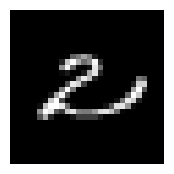

numero 3 classificato come 2


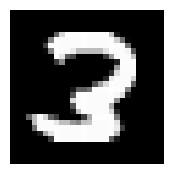

numero 9 classificato come 7


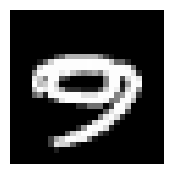

numero 1 classificato come 3


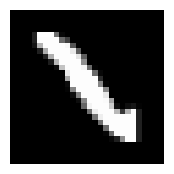

numero 5 classificato come 0


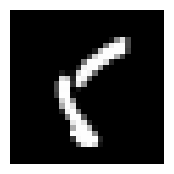

numero 3 classificato come 8


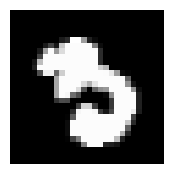

numero 4 classificato come 9


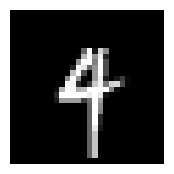

numero 2 classificato come 3


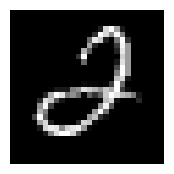

numero 4 classificato come 9


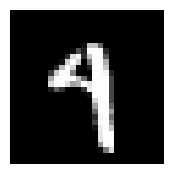

numero 2 classificato come 6


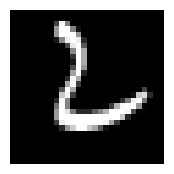

numero 6 classificato come 5


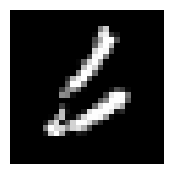

numero 8 classificato come 9


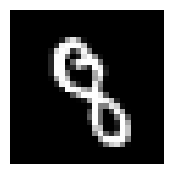

numero 8 classificato come 7


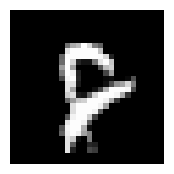

numero 8 classificato come 9


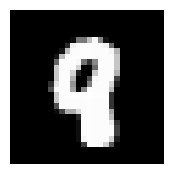

numero 2 classificato come 6


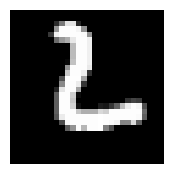

numero 2 classificato come 3


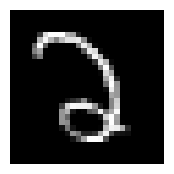

numero 5 classificato come 4


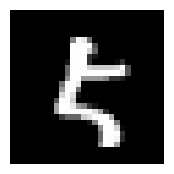

numero 3 classificato come 8


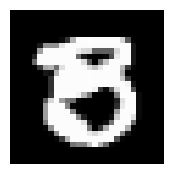

numero 7 classificato come 1


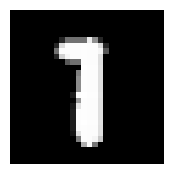

numero 3 classificato come 9


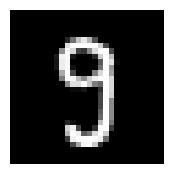

numero 2 classificato come 1


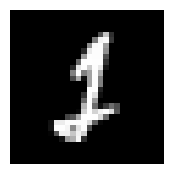

numero 2 classificato come 9


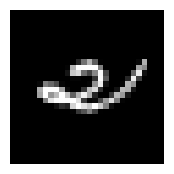

numero 8 classificato come 2


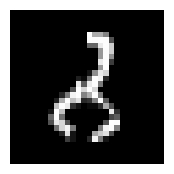

numero 8 classificato come 3


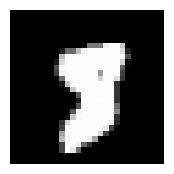

numero 4 classificato come 1


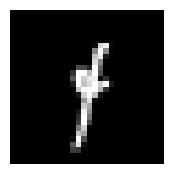

numero 2 classificato come 0


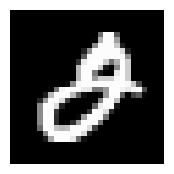

numero 8 classificato come 3


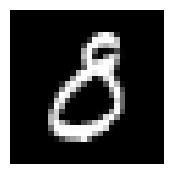

numero 8 classificato come 9


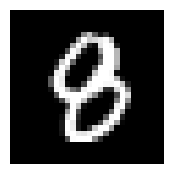

numero 5 classificato come 0


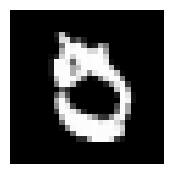

numero 1 classificato come 9


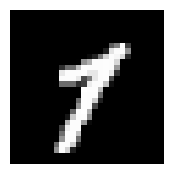

numero 4 classificato come 9


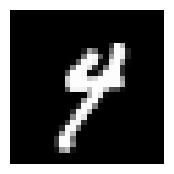

numero 8 classificato come 9


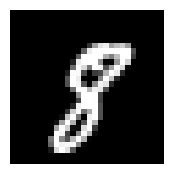

numero 5 classificato come 9


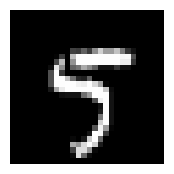

numero 2 classificato come 7


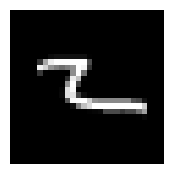

numero 1 classificato come 3


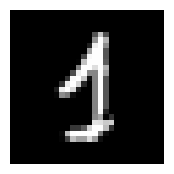

numero 3 classificato come 5


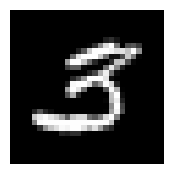

numero 5 classificato come 3


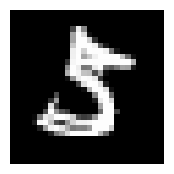

numero 8 classificato come 2


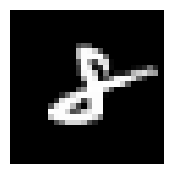

numero 0 classificato come 4


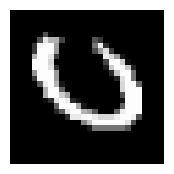

numero 3 classificato come 5


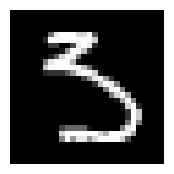

numero 9 classificato come 4


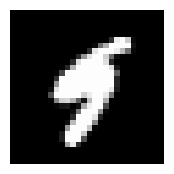

numero 9 classificato come 8


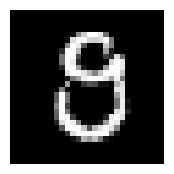

numero 4 classificato come 9


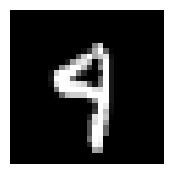

numero 5 classificato come 0


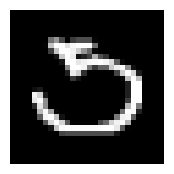

numero 3 classificato come 5


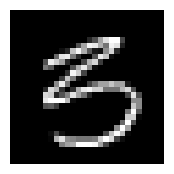

numero 3 classificato come 9


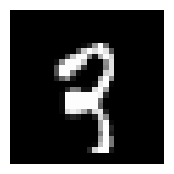

numero 4 classificato come 9


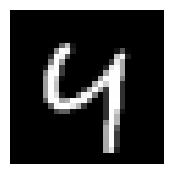

numero 9 classificato come 8


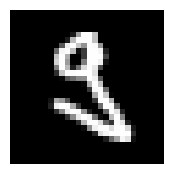

numero 7 classificato come 4


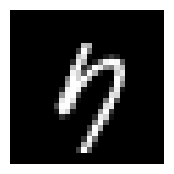

numero 1 classificato come 9


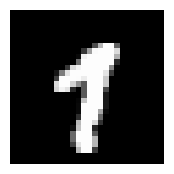

numero 5 classificato come 0


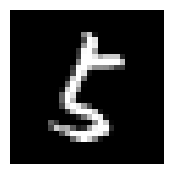

numero 2 classificato come 4


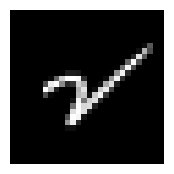

numero 8 classificato come 3


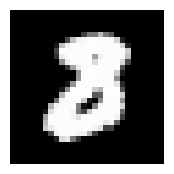

numero 2 classificato come 6


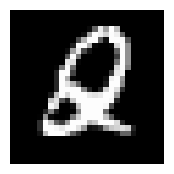

numero 0 classificato come 5


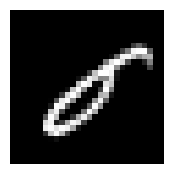

numero 6 classificato come 5


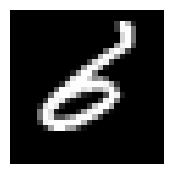

numero 6 classificato come 1


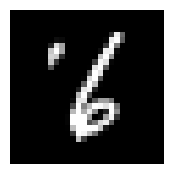

numero 9 classificato come 0


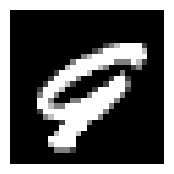

numero 5 classificato come 3


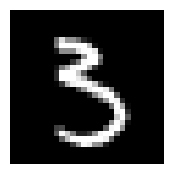

numero 4 classificato come 9


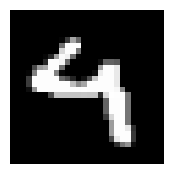

numero 1 classificato come 4


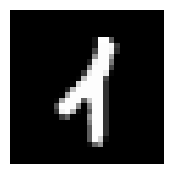

numero 8 classificato come 1


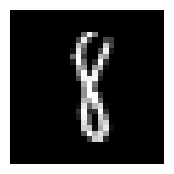

numero 2 classificato come 4


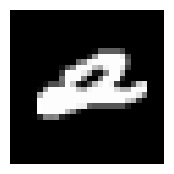

numero 4 classificato come 6


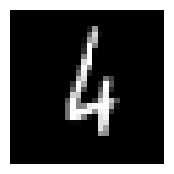

numero 0 classificato come 8


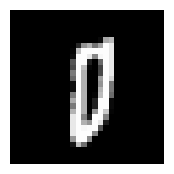

numero 7 classificato come 9


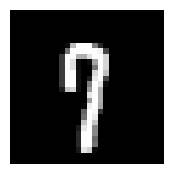

numero 2 classificato come 7


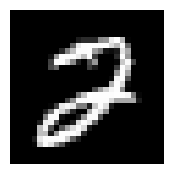

numero 7 classificato come 9


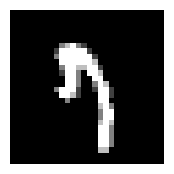

numero 3 classificato come 5


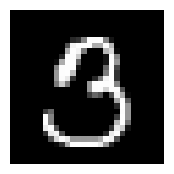

numero 9 classificato come 1


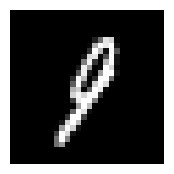

numero 2 classificato come 6


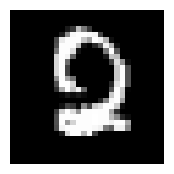

numero 8 classificato come 9


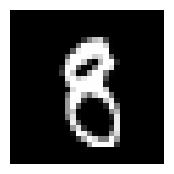

numero 7 classificato come 2


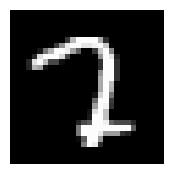

numero 4 classificato come 9


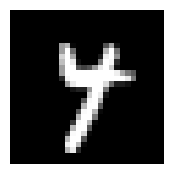

numero 9 classificato come 3


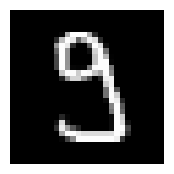

numero 2 classificato come 7


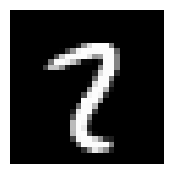

numero 6 classificato come 5


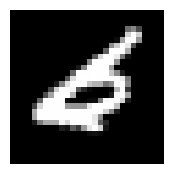

numero 2 classificato come 0


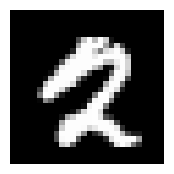

numero 2 classificato come 7


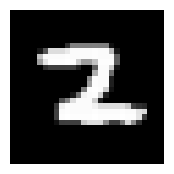

numero 5 classificato come 9


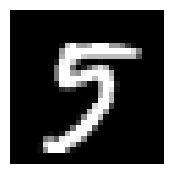

numero 3 classificato come 5


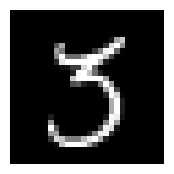

numero 2 classificato come 8


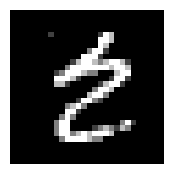

numero 2 classificato come 1


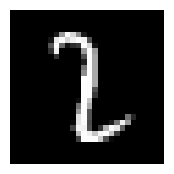

numero 0 classificato come 7


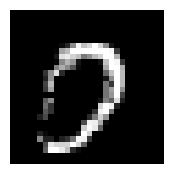

numero 8 classificato come 1


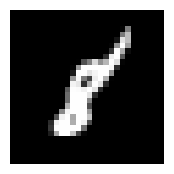

numero 9 classificato come 4


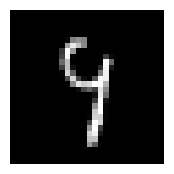

numero 9 classificato come 7


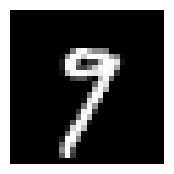

In [12]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

plt.figure(figsize=(4,4))
for i in range(len(X_test)):
    if (y_test[i] != y_pred_classes[i]):
        print("numero %d classificato come %d" % (y_test[i], y_pred_classes[i]))
        plt.figure(figsize=(2,2))
        plt.imshow(X_test[i].reshape([28,28]), cmap='gray')
        plt.axis('off')
        plt.show()

 # Fashion-MNIST

In [2]:
(X_train2,y_train2),(X_test2, y_test2) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Dato che una singola osservazione è una matrice, dobbiamo spacchettare le righe all'interno di un singolo vettore. Per farlo possiamo utilizzare il metodo reshape.

In [3]:
X_train2 = X_train2.reshape(X_train2.shape[0], 28*28)
X_test2 = X_test2.reshape(X_test2.shape[0], 28*28)
X_train2 = X_train2/255
X_test2 = X_test2/255

Passiamo agli array con i target, questi contengono un valore numerico che va da 0 a 9, il quale rappresenta la categoria di appartenenza dell'articolo raffigurato nell'immagine, tra quelle elencate sopra.
Per poter eseguire una classificazione multiclasse dobbiamo creare 10 variabili dummy per ogni osservazione, una per ogni classe. Possiamo farlo utilizzando la funzione to_categorical di Keras.

In [4]:
# Importiamo il nome di ogni classe all'interno di un array chiamato labels, classi che vanno da 0 a 9 (10 in totale)
labels = ["T-shirt/top","Pantalone","Pullover","Vestito","Cappotto","Sandalo","Maglietta","Sneaker","Borsa","Stivaletto"]

y_train_dummy2 = to_categorical(y_train2, 10)
y_test_dummy2 = to_categorical(y_test2, 10)

## Full batch Gradient Descent

Cominciamo dal Full batch Gradient Descent. Per prima cosa creiamo il modello, possiamo utilizzare la stessa architettura che abbiamo utilizzato in un notebook precedente per il MNIST.

In [5]:
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=X_train2.shape[1]))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 567434 (2.16 MB)
Trainable params: 567434 (2.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Adesso, per utilizzare il full batch gradient descent, non dobbiamo far altro che specificare all'interno del metodo fit che la dimensione di un batch deve essere pari al numero di osservazioni nel set di addestramento, in tal modo l'algoritmo di ottimizzazione utilizzerà un unico batch con tutte le osservazioni ad ogni iterazione del gradient descent.
Per poter costruire un grafico della funzione di costo ad ogni epoca dobbiamo tener traccia di questi valori, per farlo dobbiamo definire un callback.

In [6]:
history = History()

time_start= time.time()
# Specifico nell'addestramento del modell che la grandezza del batch è uguale al numero di osservazioni all'interno del dataset
model.fit(X_train2, y_train_dummy2, epochs=100, batch_size=X_train2.shape[0], callbacks=[history])
tempo_esecuzione = time.time() - time_start

print("Tempo di addestramento: %d minuti e %d secondi" % (tempo_esecuzione/60, tempo_esecuzione%60))

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 2.3603 - accuracy: 0.1033
Epoch 2/100
1/1 [==============================] - 0s 159ms/step - loss: 2.3361 - accuracy: 0.1111
Epoch 3/100
1/1 [==============================] - 0s 147ms/step - loss: 2.3139 - accuracy: 0.1151
Epoch 4/100
1/1 [==============================] - 0s 196ms/step - loss: 2.2934 - accuracy: 0.1184
Epoch 5/100
1/1 [==============================] - 0s 170ms/step - loss: 2.2742 - accuracy: 0.1203
Epoch 6/100
1/1 [==============================] - 0s 137ms/step - loss: 2.2561 - accuracy: 0.1238
Epoch 7/100
1/1 [==============================] - 0s 181ms/step - loss: 2.2387 - accuracy: 0.1288
Epoch 8/100
1/1 [==============================] - 0s 127ms/step - loss: 2.2220 - accuracy: 0.1358
Epoch 9/100
1/1 [==============================] - 0s 176ms/step - loss: 2.2058 - accuracy: 0.1463
Epoch 10/100
1/1 [==============================] - 0s 165ms/step - loss: 2.1901 - accuracy: 0.1603
Epoch 11/100

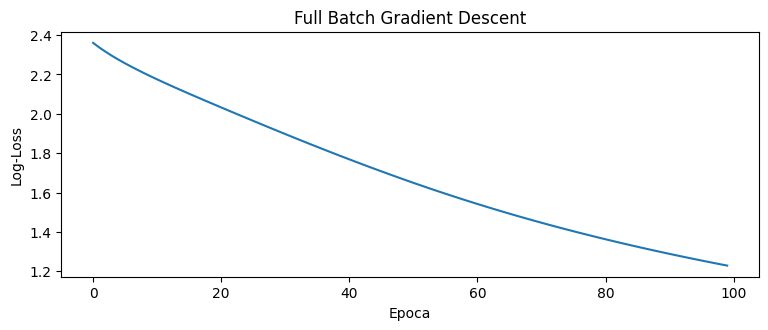

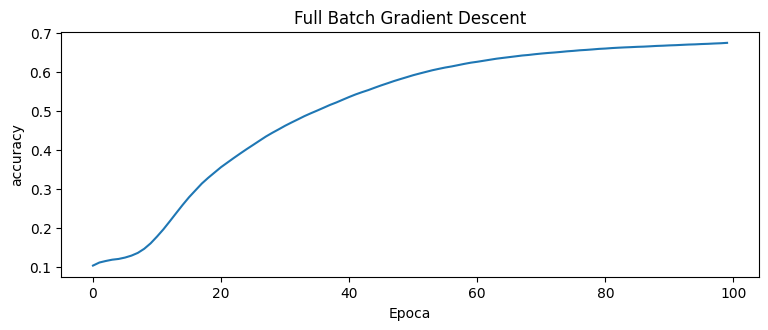

In [7]:
plt.figure(figsize=(9,7))
plt.subplot(2,1,1)
plt.title("Full Batch Gradient Descent")
plt.xlabel("Epoca")
plt.ylabel("Log-Loss")
plt.plot(history.history['loss'])
plt.figure(figsize=(9,7))
plt.subplot(2,1,2)
plt.title("Full Batch Gradient Descent")
plt.xlabel("Epoca")
plt.ylabel("accuracy")
plt.plot(history.history['accuracy'])

Notiamo come le prestazzioni del modello non arrivano mai a valori abbastanzi elevati e che la convergenza del full batch gradient descent sia molto lenta. Però è anche vero che la loss del modello si sia ridotta in maniera abbastanza pulita senza oscillazzioni al semplice aumentare delle epoche effettuate.

In [8]:
model.evaluate(X_test2, y_test_dummy2)

313/313 [==============================] - 1s 3ms/step - loss: 1.2339 - accuracy: 0.6641


[1.2339427471160889, 0.6640999913215637]

## Stochastic Gradient Descent


In [9]:
model2 = Sequential()
model2.add(Dense(512, activation='relu', input_dim=X_train2.shape[1]))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 567434 (2.16 MB)
Trainable params: 567434 (2.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Adesso, per utilizzare lo Stochastic Gradient Descent, impostiamo come dimensione del singolo batch 1, in modo tale da far utilizzare all'algoritmo di ottimizzazione un esempio per volta. Facendo questo il gradient descent ad ogni epoca viene eseguito un numero di volte pari al numero di esempi nel set di addestramento (nel nostro caso 60.000), ne segue che il completamento di un'epoca richiederà molto più tempo rispetto al full batch. Per questo motivo impostiamo il numero di epoche a 5.


In [10]:
history2 = History()

time_start = time.time()

model2.fit(X_train2, y_train_dummy2, epochs=5, batch_size=1, callbacks=[history2])
tempo_esecuzione = time.time() - time_start

print("Tempo di addestramento: %d minuti e %d secondi" % (tempo_esecuzione/60, tempo_esecuzione%60))

Epoch 1/5
60000/60000 [==============================] - 194s 3ms/step - loss: 0.5104 - accuracy: 0.8115
Epoch 2/5
60000/60000 [==============================] - 189s 3ms/step - loss: 0.3853 - accuracy: 0.8576
Epoch 3/5
60000/60000 [==============================] - 204s 3ms/step - loss: 0.3477 - accuracy: 0.8707
Epoch 4/5
60000/60000 [==============================] - 190s 3ms/step - loss: 0.3234 - accuracy: 0.8793
Epoch 5/5
60000/60000 [==============================] - 189s 3ms/step - loss: 0.3078 - accuracy: 0.8841
Tempo di addestramento: 16 minuti e 22 secondi


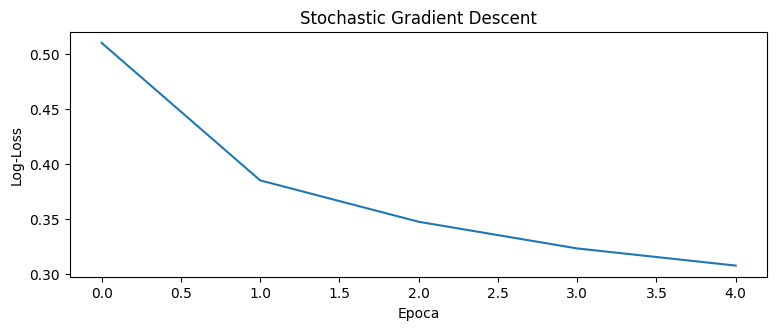

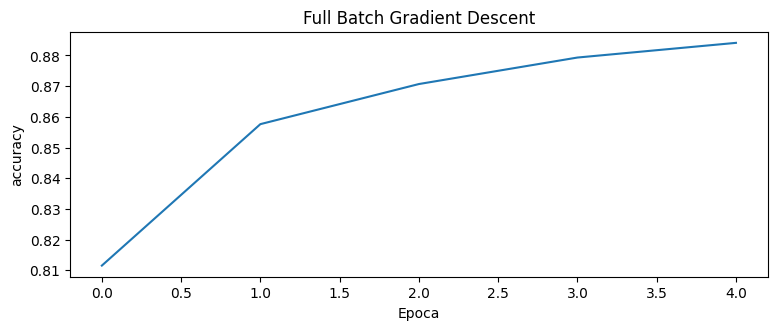

In [11]:
plt.figure(figsize=(9,7))
plt.subplot(2,1,1)
plt.title("Stochastic Gradient Descent")
plt.xlabel("Epoca")
plt.ylabel("Log-Loss")
plt.plot(history2.history['loss'])
plt.figure(figsize=(9,7))
plt.subplot(2,1,2)
plt.title("Full Batch Gradient Descent")
plt.xlabel("Epoca")
plt.ylabel("accuracy")
plt.plot(history2.history['accuracy'])

Abbiamo ottenuto prestazioni nettamente migliori a discapito però del tempo di addestramento, che ha richiesto svariati minuti


In [12]:
model2.evaluate(X_test2, y_test_dummy2)

313/313 [==============================] - 1s 2ms/step - loss: 0.3589 - accuracy: 0.8746


[0.3588551878929138, 0.8745999932289124]

## Mini Batch Gradient Descent


In [13]:
model3 = Sequential()
model3.add(Dense(512, activation='relu', input_dim=X_train2.shape[1]))
model3.add(Dense(256, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(10, activation='softmax'))
model3.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 567434 (2.16 MB)
Trainable params: 567434 (2.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


E adesso specifichiamo all'interno del metodo fit la dimensione di ogni batch, i valori consigliati sono 32, 64, 128, 256 e 512.
Optiamo per 512.

In [14]:
history3 = History()

time_start= time.time()

model3.fit(X_train2, y_train_dummy2, epochs=100, batch_size=512, callbacks=[history3])
tempo_esecuzione = time.time() - time_start

print("Tempo di addestramento: %d minuti e %d secondi" % (tempo_esecuzione/60, tempo_esecuzione%60))

Epoch 1/100
118/118 [==============================] - 1s 4ms/step - loss: 1.5864 - accuracy: 0.5566
Epoch 2/100
118/118 [==============================] - 0s 4ms/step - loss: 0.9309 - accuracy: 0.7074
Epoch 3/100
118/118 [==============================] - 0s 4ms/step - loss: 0.7611 - accuracy: 0.7519
Epoch 4/100
118/118 [==============================] - 0s 4ms/step - loss: 0.6804 - accuracy: 0.7778
Epoch 5/100
118/118 [==============================] - 1s 4ms/step - loss: 0.6282 - accuracy: 0.7945
Epoch 6/100
118/118 [==============================] - 0s 4ms/step - loss: 0.5903 - accuracy: 0.8041
Epoch 7/100
118/118 [==============================] - 0s 4ms/step - loss: 0.5625 - accuracy: 0.8123
Epoch 8/100
118/118 [==============================] - 0s 4ms/step - loss: 0.5385 - accuracy: 0.8188
Epoch 9/100
118/118 [==============================] - 1s 4ms/step - loss: 0.5219 - accuracy: 0.8217
Epoch 10/100
118/118 [==============================] - 1s 5ms/step - loss: 0.5072 - accura

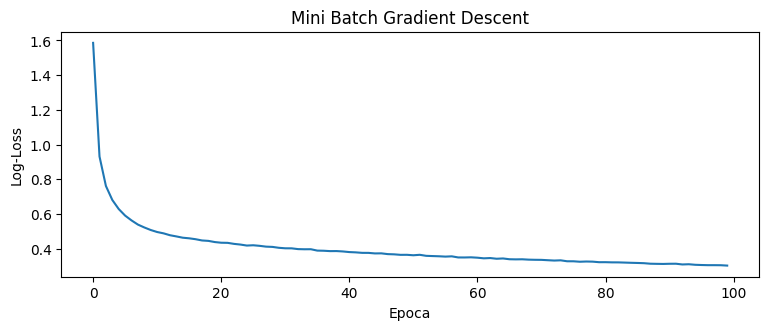

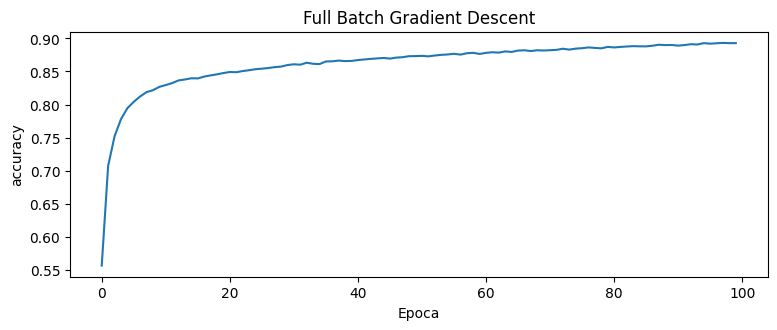

In [15]:
plt.figure(figsize=(9,7))
plt.subplot(2,1,1)
plt.title("Mini Batch Gradient Descent")
plt.xlabel("Epoca")
plt.ylabel("Log-Loss")
plt.plot(history3.history['loss'])
plt.figure(figsize=(9,7))
plt.subplot(2,1,2)
plt.title("Full Batch Gradient Descent")
plt.xlabel("Epoca")
plt.ylabel("accuracy")
plt.plot(history3.history['accuracy'])

Come si può notare l'errore si è ridotto molto in fretta durante le prime 10 epoche, dopodichè ha continuato a migliorare più lentamento oscillando però in manierà molto vistosa.

In [16]:
model3.evaluate(X_test2, y_test_dummy2)

313/313 [==============================] - 2s 6ms/step - loss: 0.3798 - accuracy: 0.8636


[0.37975364923477173, 0.8636000156402588]